In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

#### Covid Xray Images

In [2]:
root = 'covid-chestxray-dataset-master/'

In [3]:
df = pd.read_csv(root+'metadata.csv')

In [61]:
#df.head()

In [6]:
IMAGE_PATH = 'images/'
COVID_PATH = 'combined_dataset/covid'
NORMAL_PATH = 'combined_dataset/normal'

In [7]:
cnt = 0
for (i,row) in df.iterrows():
    if row['finding'] == 'COVID-19' and row['view'] == 'PA':
        f = row['filename']
        src_path = os.path.join(root,IMAGE_PATH,f)
        dest_path = os.path.join(COVID_PATH,f)
        shutil.copy2(src_path,dest_path)
        cnt +=1
        print(cnt,end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 

#### Normal XRay Images

In [8]:
root2 = "chest_xray/train/NORMAL/"

In [9]:
normal_data = os.listdir(root3)[:142]

In [10]:
cnt = 0
for f in normal_data:
    src_path = os.path.join(root3,f)
    dest_path = os.path.join(NORMAL_PATH,f)
    shutil.copy2(src_path,dest_path)
    cnt +=1
    print(cnt,end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 

In [11]:
len(os.listdir(NORMAL_PATH))

142

#### Train-Val split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
normal_x_dir = os.listdir(NORMAL_PATH)
covid_x_dir = os.listdir(COVID_PATH)

In [14]:
x_normal_train, x_normal_val = train_test_split(normal_x_dir, test_size=0.2, random_state=40)

In [15]:
x_covid_train, x_covid_val = train_test_split(covid_x_dir, test_size=0.2, random_state=40)

In [16]:
cnt = 0
PATH = 'combined_dataset/train'
for fn,fc in zip(x_normal_train,x_covid_train):
    src_path_norm = os.path.join(NORMAL_PATH,fn)
    src_path_cov = os.path.join(COVID_PATH,fc)
    dest_path_norm = os.path.join(PATH,'normal',fn)
    dest_path_cov = os.path.join(PATH,'covid',fc)
    shutil.move(src_path_norm,dest_path_norm)
    shutil.move(src_path_cov,dest_path_cov)
    cnt +=1
    print(cnt,end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 

In [17]:
cnt = 0
PATH = 'combined_dataset/val'
for fn,fc in zip(x_normal_val,x_covid_val):
    src_path_norm = os.path.join(NORMAL_PATH,fn)
    src_path_cov = os.path.join(COVID_PATH,fc)
    dest_path_norm = os.path.join(PATH,'normal',fn)
    dest_path_cov = os.path.join(PATH,'covid',fc)
    shutil.move(src_path_norm,dest_path_norm)
    shutil.move(src_path_cov,dest_path_cov)
    cnt +=1
    print(cnt,end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

#### Data Generator

In [18]:
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [19]:
train_dg = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

In [20]:
val_dg = image.ImageDataGenerator(
    rescale=1./255,)

In [21]:
train_gen = train_dg.flow_from_directory(
    'combined_dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 226 images belonging to 2 classes.


In [22]:
train_gen.class_indices

{'covid': 0, 'normal': 1}

In [23]:
val_gen = val_dg.flow_from_directory(
    'combined_dataset/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 58 images belonging to 2 classes.


In [24]:
val_gen.class_indices

{'covid': 0, 'normal': 1}

#### Model

In [25]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)        0         
__________

#### Train

In [29]:
hist = model.fit_generator(
    train_gen,
    steps_per_epoch=8,
    epochs = 16,
    validation_data = val_gen,
    validation_steps = 2
)

Epoch 1/16
8/8 [==============================] - 123s 15s/step - loss: 1.1676 - acc: 0.5193 - val_loss: 0.6790 - val_acc: 0.5862
Epoch 2/16
8/8 [==============================] - 107s 13s/step - loss: 0.6321 - acc: 0.6586 - val_loss: 0.6076 - val_acc: 0.6897
Epoch 3/16
8/8 [==============================] - 105s 13s/step - loss: 0.5261 - acc: 0.7820 - val_loss: 0.3958 - val_acc: 0.9483
Epoch 4/16
8/8 [==============================] - 110s 14s/step - loss: 0.3142 - acc: 0.8573 - val_loss: 0.2707 - val_acc: 0.9310
Epoch 5/16
8/8 [==============================] - 111s 14s/step - loss: 0.2527 - acc: 0.8567 - val_loss: 0.2977 - val_acc: 0.9828
Epoch 6/16
8/8 [==============================] - 111s 14s/step - loss: 0.3571 - acc: 0.8850 - val_loss: 0.3019 - val_acc: 1.0000
Epoch 7/16
8/8 [==============================] - 108s 13s/step - loss: 0.1907 - acc: 0.9287 - val_loss: 0.1291 - val_acc: 0.9828
Epoch 8/16
8/8 [==============================] - 109s 14s/step - loss: 0.1265 - acc: 0.95

In [30]:
model.save('model.h5')

In [32]:
len(train_gen)

8

In [34]:
model.evaluate_generator(train_gen,steps=len(train_gen))

[0.0690689796037906, 0.9867256637168141]

In [37]:
model.evaluate_generator(val_gen,steps=len(val_gen))

[0.05668369295268223, 0.9827586083576597]

#### Model Testing

In [38]:
model = load_model('model.h5')

In [54]:
y_true = []
y_pred = []

In [55]:
PATH = "combined_dataset/val/"
for f in os.listdir(PATH+'normal/'):
    img = image.load_img(PATH+'normal/'+f,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    pred = model.predict_classes(img)
    y_pred.append(pred[0,0])
    y_true.append(1)

In [56]:
PATH = "combined_dataset/val/"
for f in os.listdir(PATH+'covid/'):
    img = image.load_img(PATH+'covid/'+f,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    pred = model.predict_classes(img)
    y_pred.append(pred[0,0])
    y_true.append(0)

In [57]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#### Visualisation

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [59]:
cn = confusion_matrix(y_true,y_pred)

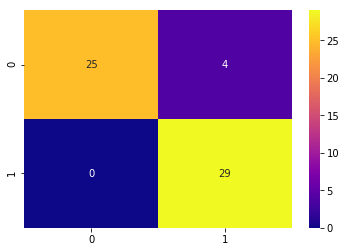

In [60]:
sn.heatmap(cn,cmap="plasma",annot=True)